In [326]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [327]:
plt.rcParams['figure.figsize'] = [20,10]

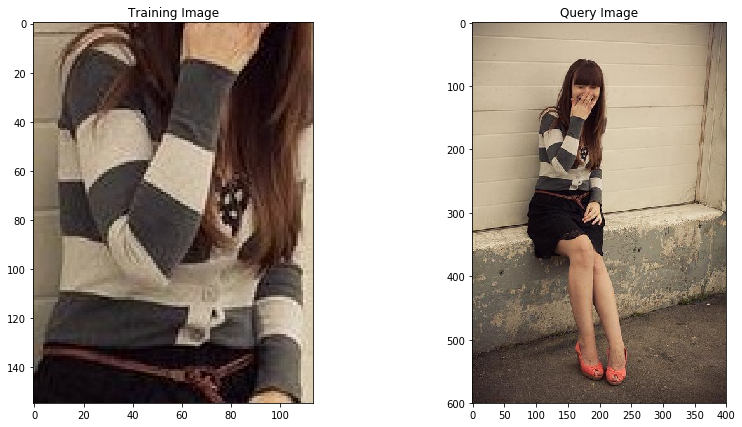

In [419]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('./MSD/sample_testset/crops/5f9782a4-58a0-5f0d-b38e-b9a2d4a406b9.jpg')

# Load the query image
image2 = cv2.imread('./MSD/sample_testset/images/5a3df8d7-e26d-47a1-a467-77c8a19af8b8.jpg')
""
# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

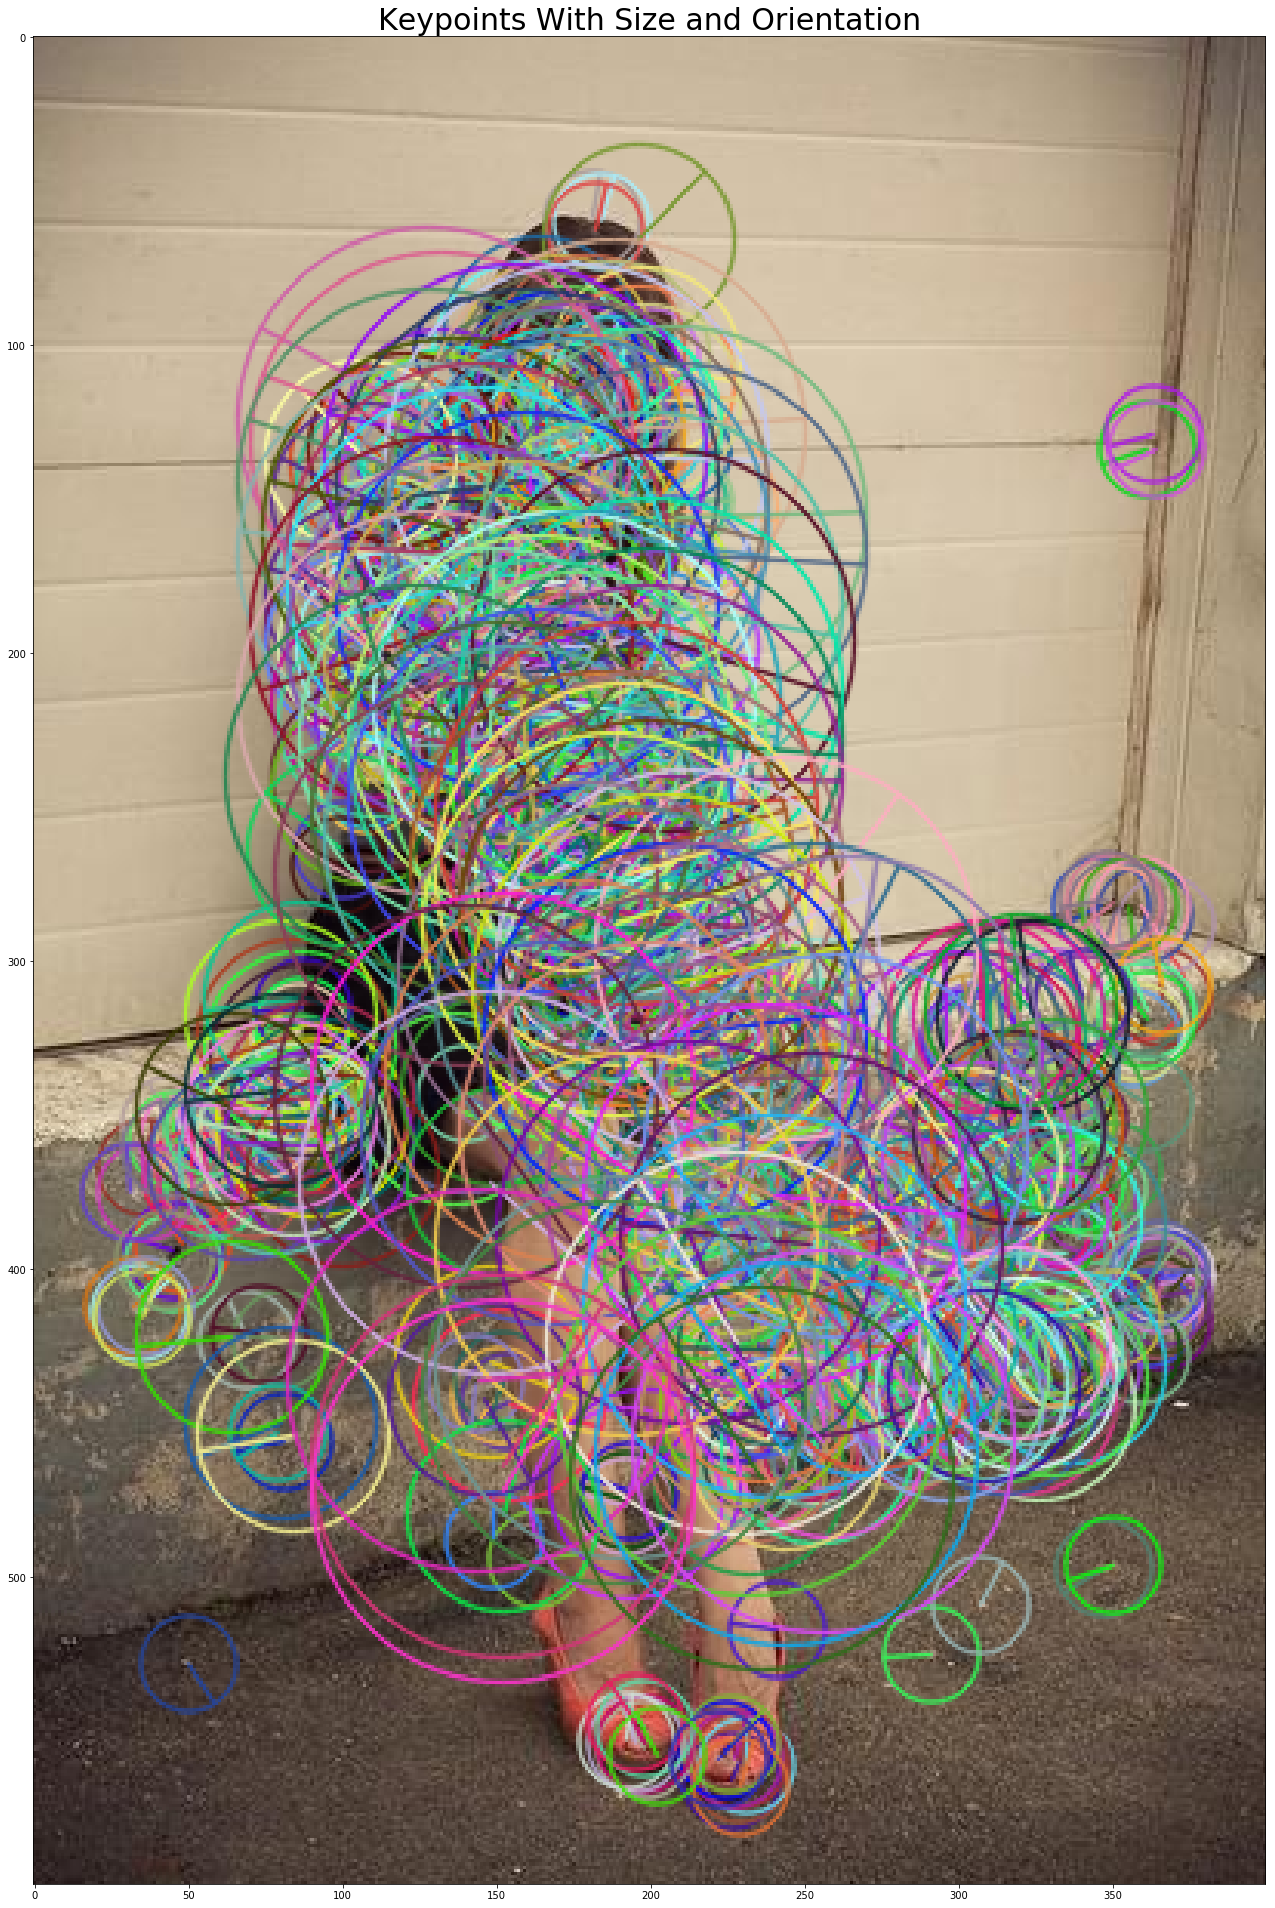


Number of keypoints Detected:  828


In [420]:
import copy
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
# orb = cv2.SIFT()
# sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=2)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

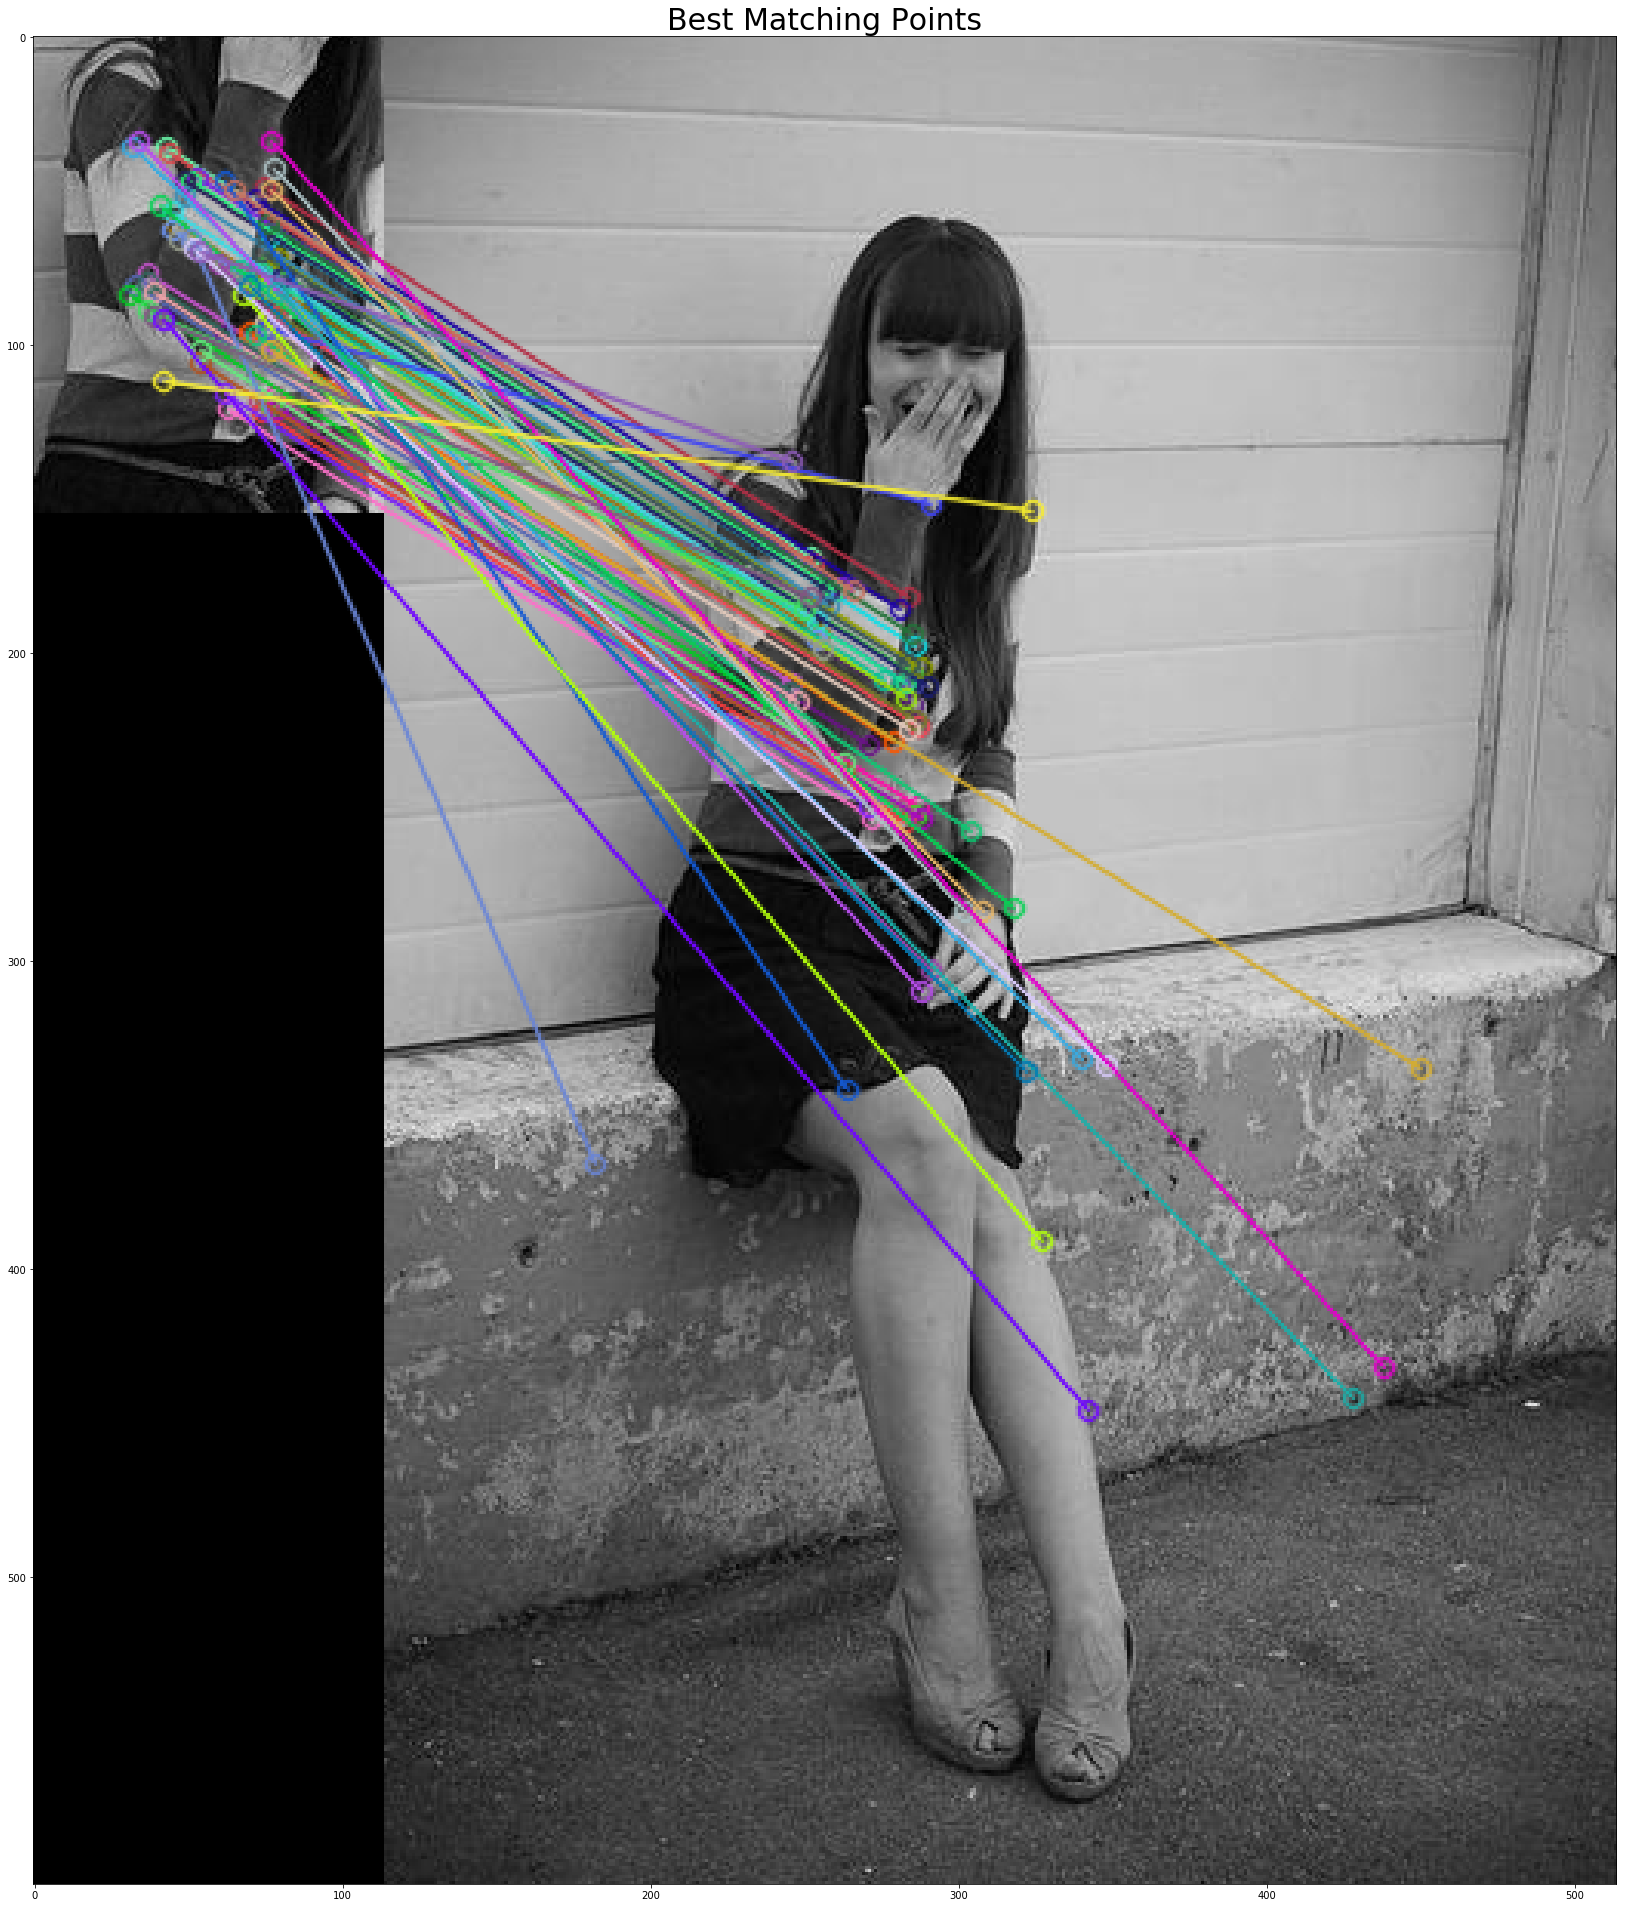

Number of Keypoints Detected In The Training Image:  89
Number of Keypoints Detected In The Query Image:  828

Number of Matching Keypoints Between The Training and Query Images:  64


In [421]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)


matches = bf.match(descriptors_train, descriptors_query)

    # The matches with shorter distance are required. So, the matches are sort according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [422]:
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
c=0
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = keypoints_query[img2_idx].pt
    (x2,y2) = keypoints_train[img1_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [423]:
print(list_kp1)
a =max(list_kp1)
b = min(list_kp1)
print(a)
print(b)
print(abs(a[1]-b[1]))
print(training_gray.shape)

[(138.0, 169.0), (172.0, 198.0), (171.0, 207.0), (171.0, 211.0), (168.0, 251.0), (169.0, 255.0), (139.0, 171.0), (148.0, 179.0), (146.0, 180.0), (141.0, 194.0), (174.0, 205.0), (132.0, 210.0), (169.0, 210.0), (128.0, 214.0), (171.0, 217.0), (173.0, 224.0), (173.0, 250.0), (172.0, 253.0), (144.0, 180.0), (170.0, 182.0), (144.0, 185.0), (140.0, 190.0), (140.0, 196.0), (162.0, 209.0), (176.0, 211.0), (157.0, 230.0), (158.0, 254.0), (174.0, 254.0), (167.0, 186.0), (172.0, 222.0), (149.0, 239.0), (169.0, 215.0), (171.0, 194.0), (142.0, 199.0), (126.0, 217.0), (132.0, 213.0), (165.0, 229.0), (134.0, 216.0), (157.0, 250.0), (149.0, 236.0), (170.0, 204.0), (170.0, 225.0), (177.0, 152.0), (190.0, 258.0), (226.0, 332.0), (150.0, 342.0), (204.0, 283.0), (68.0, 366.0), (188.0, 284.0), (177.0, 303.0), (194.0, 284.0), (174.0, 310.0), (213.0, 391.0), (136.0, 186.0), (336.0, 335.0), (152.0, 180.0), (234.0, 334.0), (314.0, 442.0), (132.0, 138.0), (138.0, 182.0), (324.0, 432.0), (228.0, 446.0), (208.0, 

In [424]:
import numpy as np 

MIN_MATCH_COUNT = 10
if len(matches)>MIN_MATCH_COUNT:
    
    src_pts = np.float32([ keypoints_train[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints_query[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    x_max, y_max = np.max(np.max(dst_pts, axis=1), axis=0)
    x_min, y_min = np.min(np.min(dst_pts, axis=1), axis=0)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    print(x_max,x_min, y_max, y_min)

    h,w = training_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
#     M = cv2.getPerspectiveTransform(src_pts, dst_pts)
#     dst = cv2.warpPerspective(query_gray,M,(h,w))
#     if abs(x_max-x_min)>h or abs(y_max-y_min)>w:
#         print("Not enough matches are found - %d/%d" % (len(matches),MIN_MATCH_COUNT))
    
    print(dst)
    print(np.int32(dst))
    query_gray = cv2.polylines(query_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    area = cv2.contourArea(dst)
    print(area, (h*w))

else:
    print("Not enough matches are found - %d/%d" % (len(matches),MIN_MATCH_COUNT))
    matchesMask = None

336.0 68.0 446.0 138.0
[[[ 94.54561 132.30824]]

 [[ 93.78985 288.8149 ]]

 [[207.6648  286.52365]]

 [[207.2559  134.12534]]]
[[[ 94 132]]

 [[ 93 288]]

 [[207 286]]

 [[207 134]]]
17498.286587494134 17670


In [427]:
box = [np.int32(dst)][0].reshape(-1,2)
for i,j in box:
    if i<0 or j<0:
        print(1)

ValueError: not enough values to unpack (expected 2, got 1)

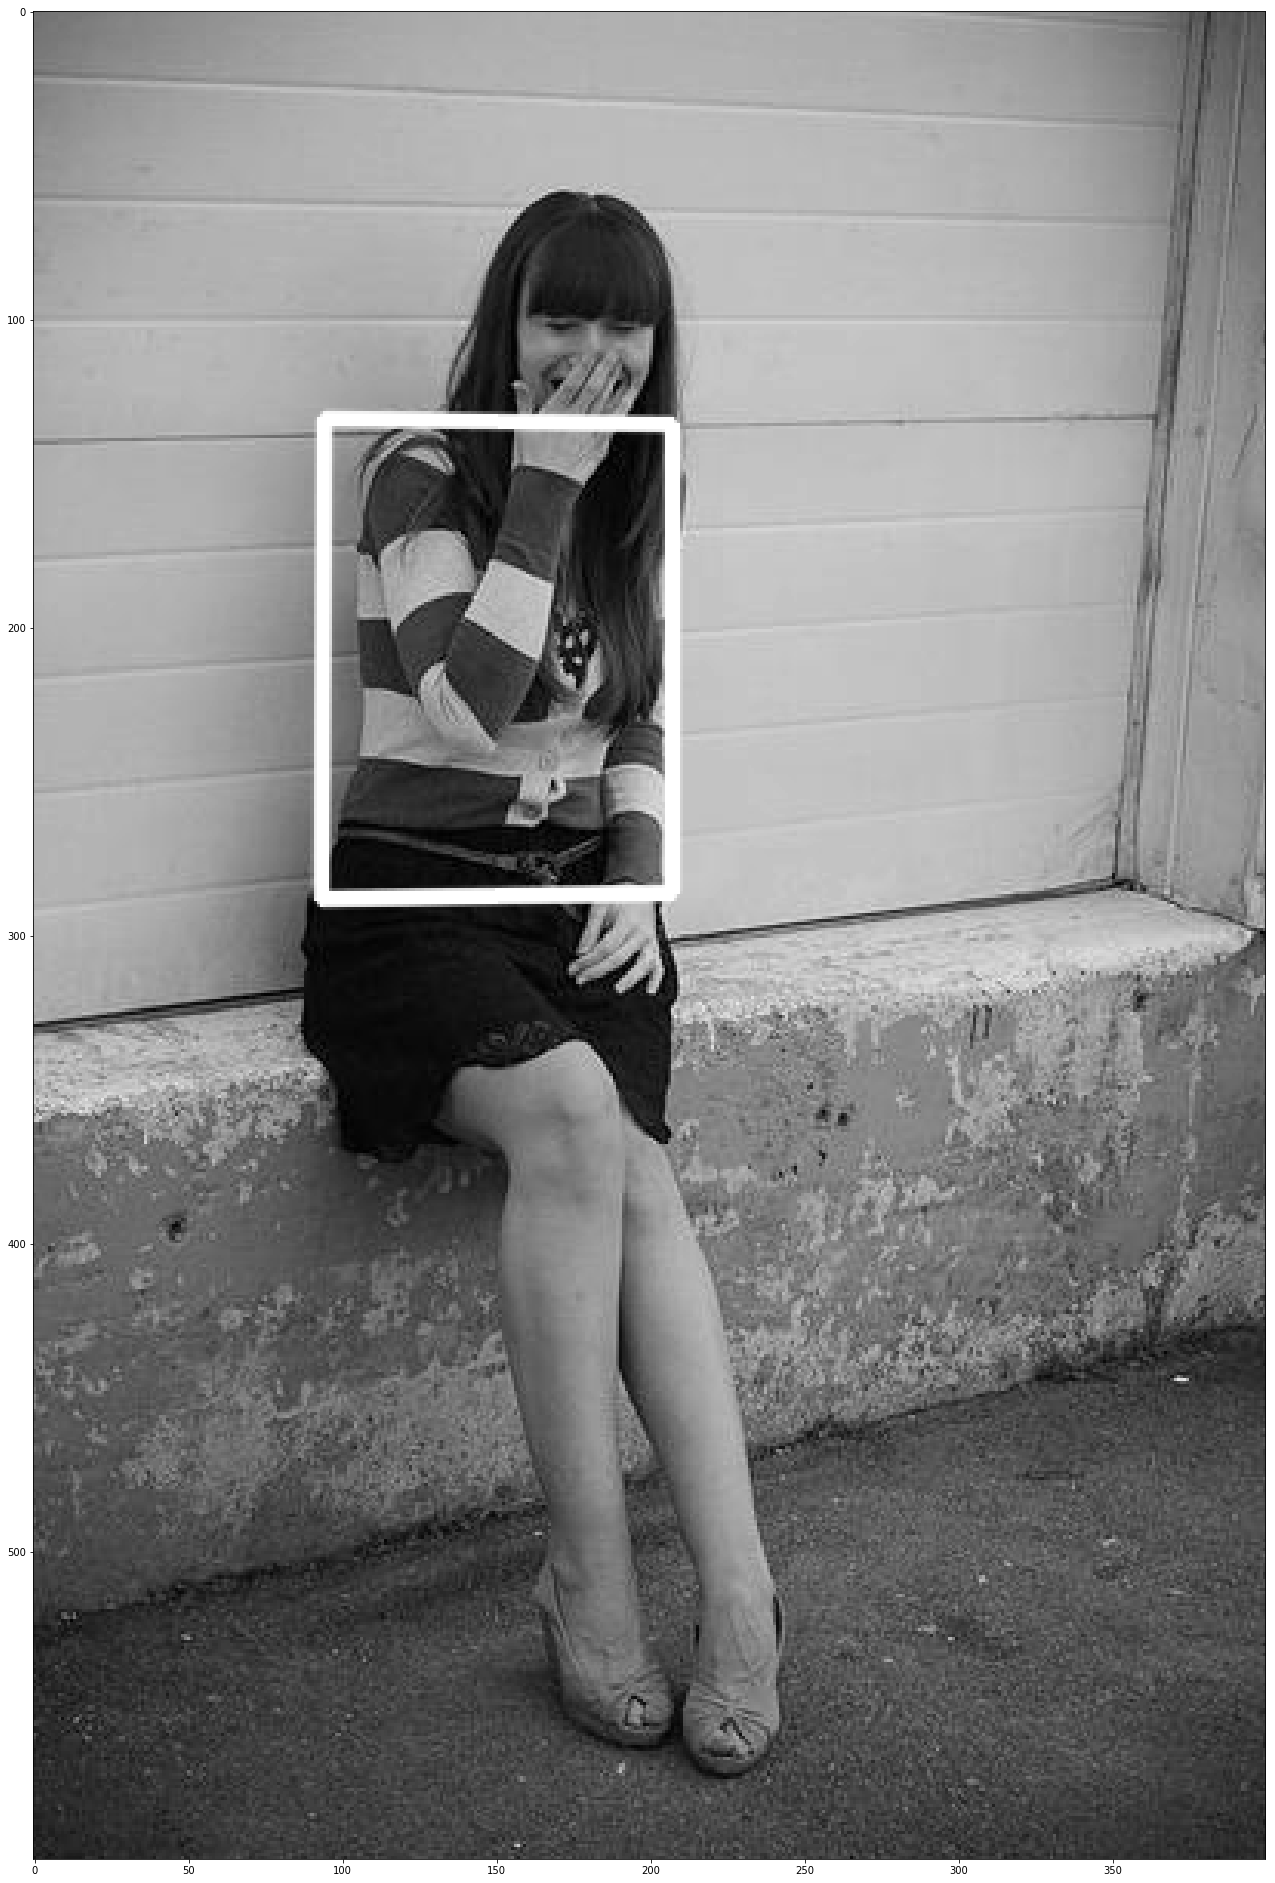

In [426]:
plt.imshow(query_gray, cmap='gray')
plt.show()

In [399]:
box = [np.int32(dst)][0].reshape(-1,2)
type(box)

numpy.ndarray

In [124]:
x1,y1=box[0]
x2,y2=box[2]

In [125]:
print(x1,y1)

251 243
